<a href="https://www.kaggle.com/code/pttljessy/eda-parkinson-s-disease-removing-outliers?scriptVersionId=148385050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents
**Step 1: Import necessary libraries and packages**

**Step 2: Cleaning data**

**Step 3: EDA**

Plot the distribution plots for the microbusiness_density

Detecting and Removing outliers using IQR-based technique

Asking analytical questions and visualisations

Examples:

**Step 4: Insights Summary**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-pre

# Step 1: Import necessary libraries and packages

In [2]:
#Importing necessary libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# returns current date and time
now = datetime.now()

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.linear_model import LinearRegression
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

# Step 2: Clean data

Loading data & checking summary stats

In [3]:
#load
proteins = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

peptides = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")

clinical_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")

Preprocessing data

In [4]:
# Get Information about Missing Values
proteins.isnull().sum() #check how many missing values by variable

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [5]:
# Get Information about Missing Values
peptides.isnull().sum() #check how many missing values by variable

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [6]:
# Get Information about Missing Values
clinical_data.isnull().sum() #check how many missing values by variable

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [7]:
# Removing Null Entries
clinical_data = clinical_data.dropna() # drop missing values and assign the data to no_missing

In [8]:
#check again how many missing values by variable
clinical_data.isnull().sum() 

visit_id                               0
patient_id                             0
visit_month                            0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

In [9]:
proteins.duplicated().sum() # check duplicates
peptides.duplicated().sum() # check duplicates
clinical_data.duplicated().sum() # check duplicates

0

# Step 3: EDA

# Protein EDA

In [10]:
proteins.sample(n=100)


,visit_id,visit_month,patient_id,UniProt,NPX
178428,11686_48,48,11686,P02656,76496.30
183410,20212_48,48,20212,P32754,99123.10
42356,5036_6,6,5036,P02766,9285170.00
78654,20460_12,12,20460,P05067,628344.00
181192,15009_48,48,15009,P06681,73568.70
...,...,...,...,...,...
154927,25827_36,36,25827,P17936,4962.42
9861,17414_0,0,17414,P04075,14529.60
97108,54979_12,12,54979,P07711,36159.50
164774,47171_36,36,47171,P07195,5472.53


In [11]:
# counting unique values
n = len(pd.unique(proteins['patient_id']))
  
print("No.of.unique patient_id values :", 
      n)


No.of.unique patient_id values : 248


There are 248 patients in proteins dataframe

In [12]:
proteins.describe()

,visit_month,patient_id,NPX
count,232741.000000,232741.000000,2.327410e+05
mean,26.099205,32593.881873,2.712077e+06
std,22.874719,18608.479506,2.224155e+07
min,0.000000,55.000000,8.460820e+01
25%,6.000000,16566.000000,2.946440e+04
50%,24.000000,29313.000000,1.135560e+05
75%,48.000000,49995.000000,5.638940e+05
max,108.000000,65043.000000,6.138510e+08


In [13]:
sort_std=proteins.groupby(['patient_id']).describe()['visit_month'].sort_values('count', ascending=False)
sort_std

,count,mean,std,min,25%,50%,75%,max
patient_id,,,,,,,,
62723,1929.0,37.940902,28.208814,0.0,12.0,36.0,60.0,84.0
20404,1924.0,38.011435,28.344913,0.0,12.0,36.0,60.0,84.0
23391,1919.0,37.869724,28.238256,0.0,12.0,36.0,60.0,84.0
26210,1912.0,37.860879,28.179649,0.0,12.0,36.0,60.0,84.0
18183,1899.0,37.971564,28.352315,0.0,12.0,36.0,60.0,84.0
...,...,...,...,...,...,...,...,...
55240,429.0,29.930070,30.034945,0.0,0.0,0.0,60.0,60.0
42086,427.0,18.014052,6.007022,12.0,12.0,24.0,24.0,24.0
25911,419.0,17.871122,18.021056,0.0,0.0,0.0,36.0,36.0


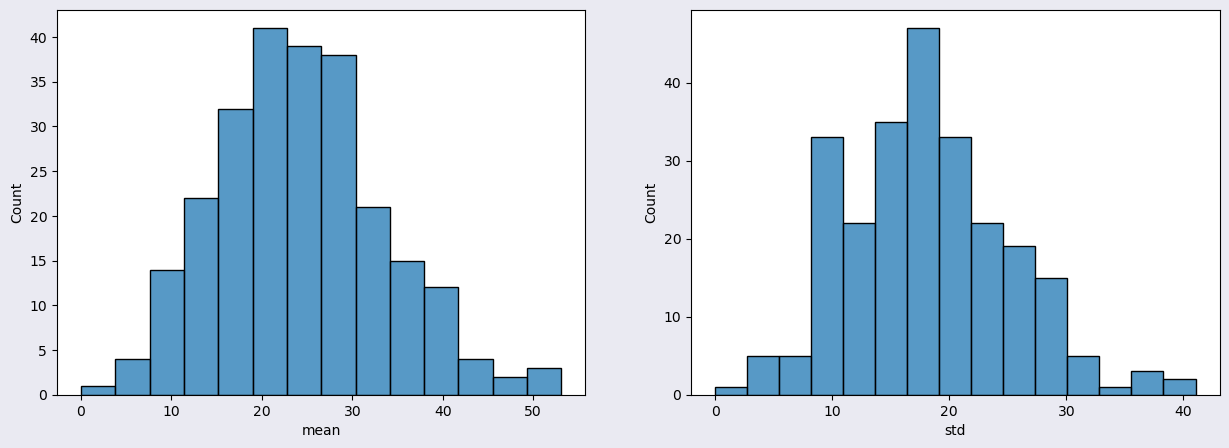

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=sort_std,x='mean',ax=axes[0])
sns.histplot(data=sort_std,x='std',ax=axes[1])
plt.show()

Visit month follows right-skewed distribution. Hence in this preprocessing stage, we will use IQR-based technique to detect and thus remove outliers before performing any model training

# Peptides EDA

In [15]:
peptides.sample(n=100)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
326104,17201_12,12,17201,P11142,NSLESYAFNMK,55070.1
375476,37566_12,12,37566,P07333,IPVIEPSVPELVVKPGATVTLR,21665.8
165229,62732_0,0,62732,P02768,DDKETC(UniMod_4)FAEEGKK,507073.0
568329,52266_24,24,52266,P01024,VPVAVQGEDTVQSLTQGDGVAK,155860.0
557517,45181_24,24,45181,P00751,FLC(UniMod_4)TGGVSPYADPNTC(UniMod_4)R,30456.4
...,...,...,...,...,...,...
302200,10138_12,12,10138,P01009,LSSWVLLMK,468837.0
485029,16238_24,24,16238,P05090,VLNQELR,1663240.0
5674,4161_0,0,4161,P02768,QTALVELVK,20012400.0
95373,35675_0,0,35675,Q12805,GSFAC(UniMod_4)QC(UniMod_4)PPGYQK,132121.0


In [16]:
peptides.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [17]:
sort_std2=peptides.groupby(['patient_id']).describe()['visit_month'].sort_values('count', ascending=False)
sort_std2

,count,mean,std,min,25%,50%,75%,max
patient_id,,,,,,,,
20404,8272.0,37.988878,28.328332,0.0,12.0,36.0,60.0,84.0
23391,8147.0,37.998036,28.227131,0.0,12.0,36.0,60.0,84.0
62723,8111.0,38.031315,28.251460,0.0,12.0,36.0,60.0,84.0
26210,8076.0,37.839525,28.226716,0.0,12.0,36.0,60.0,84.0
18183,7965.0,37.893032,28.391335,0.0,12.0,36.0,60.0,84.0
...,...,...,...,...,...,...,...,...
55240,1810.0,30.000000,30.008291,0.0,0.0,30.0,60.0,60.0
52119,1804.0,9.026608,3.000714,6.0,6.0,12.0,12.0,12.0
25911,1782.0,18.040404,18.005007,0.0,0.0,36.0,36.0,36.0


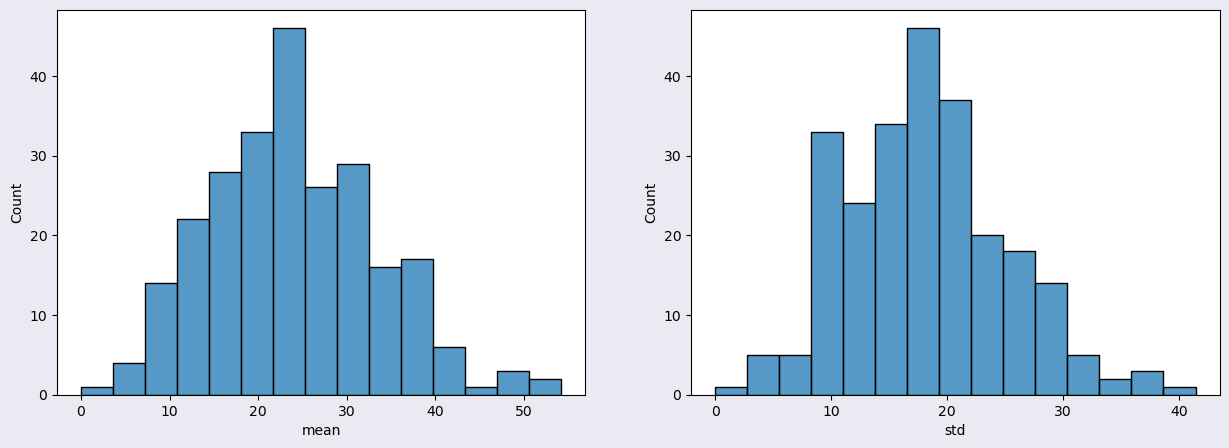

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=sort_std2,x='mean',ax=axes[0])
sns.histplot(data=sort_std2,x='std',ax=axes[1])
plt.show()

Visit month follows the normal distribution. Hence in this preprocessing stage, we will use empirical relations of Normal distribution technique to detect and thus remove outliers before performing any model training

In [19]:
sort_std3=peptides.groupby(['patient_id']).describe()['PeptideAbundance'].sort_values('count', ascending=False)
sort_std3

,count,mean,std,min,25%,50%,75%,max
patient_id,,,,,,,,
20404,8272.0,653197.303339,3.196549e+06,87.1333,32163.350,83658.20,247731.75,73039400.0
23391,8147.0,664091.990193,3.295461e+06,74.3393,27541.300,74462.70,234987.50,81438400.0
62723,8111.0,586822.388877,3.443356e+06,91.0964,26181.800,70156.80,195217.50,118435000.0
26210,8076.0,596935.901322,3.021574e+06,75.6008,27005.200,69827.80,204908.75,77536200.0
18183,7965.0,675457.948800,3.493773e+06,72.4971,32023.300,79467.60,240629.00,100426000.0
...,...,...,...,...,...,...,...,...
55240,1810.0,717998.674111,3.826178e+06,81.1983,30032.400,77977.65,222084.75,97928100.0
52119,1804.0,578241.269765,3.108659e+06,118.7120,25944.400,67511.15,191964.25,70436600.0
25911,1782.0,694300.872389,3.694195e+06,102.9630,27822.250,72546.05,222041.00,86107400.0


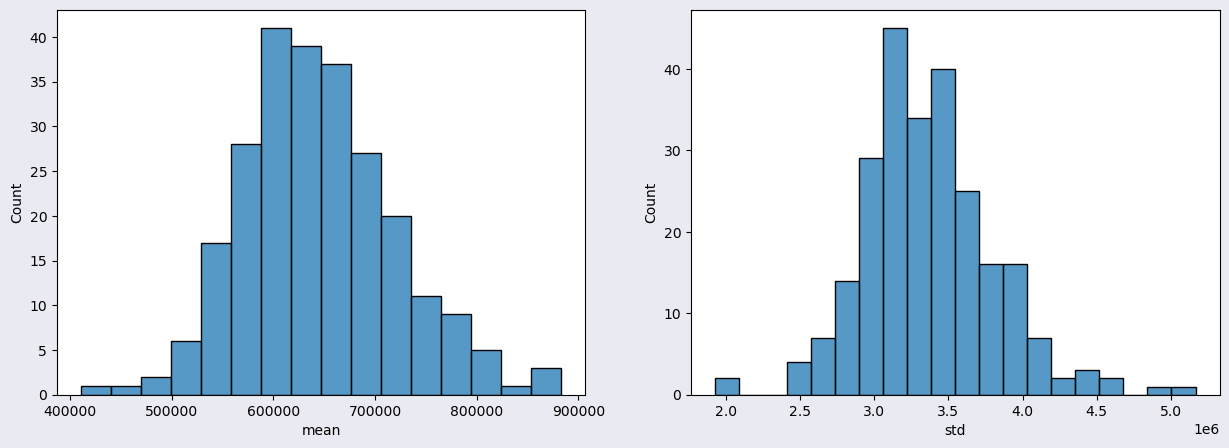

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=sort_std3,x='mean',ax=axes[0])
sns.histplot(data=sort_std3,x='std',ax=axes[1])
plt.show()

Peptides Abundance follows the right-skewed distribution. Hence in this preprocessing stage, we will use IQR-based technique to detect and thus remove outliers before performing any model training

# Clinic data EDA

In [21]:
clinical_data.sample(n=100)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
2604,65043_12,65043,12,4.0,7.0,14.0,0.0,Off
283,8344_42,8344,42,6.0,11.0,23.0,0.0,On
306,10138_24,10138,24,4.0,7.0,19.0,10.0,On
285,8344_54,8344,54,6.0,12.0,21.0,0.0,On
1269,28327_72,28327,72,6.0,6.0,37.0,7.0,Off
...,...,...,...,...,...,...,...,...
2605,65043_18,65043,18,6.0,7.0,13.0,0.0,Off
2534,62732_0,62732,0,17.0,8.0,21.0,3.0,On
1241,27971_84,27971,84,5.0,13.0,37.0,6.0,On
756,18204_72,18204,72,6.0,6.0,23.0,2.0,Off


In [22]:
clinical_data.describe()


,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000
mean,33737.863384,39.173948,9.411438,9.791104,26.994440,2.25973
std,18620.884409,23.301659,5.792440,6.156418,13.146144,3.21192
min,55.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,16931.000000,24.000000,5.000000,5.000000,17.000000,0.00000
50%,31270.000000,36.000000,8.000000,8.000000,26.000000,0.00000
75%,51846.000000,54.000000,13.000000,13.000000,35.000000,4.00000
max,65043.000000,108.000000,31.000000,40.000000,86.000000,20.00000


In [23]:
sort_std4=clinical_data.groupby(['patient_id']).describe()['visit_month'].sort_values('count', ascending=False)
sort_std4

,count,mean,std,min,25%,50%,75%,max
patient_id,,,,,,,,
26104,13.0,45.000000,27.440845,9.0,24.00,42.0,60.00,96.0
13618,13.0,45.000000,27.440845,9.0,24.00,42.0,60.00,96.0
52266,13.0,52.615385,30.214617,12.0,30.00,48.0,72.00,108.0
15009,12.0,54.500000,30.749723,12.0,33.00,51.0,75.00,108.0
18560,12.0,40.750000,23.775943,9.0,22.50,39.0,55.50,84.0
...,...,...,...,...,...,...,...,...
51708,3.0,96.000000,12.000000,84.0,90.00,96.0,102.00,108.0
52119,2.0,13.500000,6.363961,9.0,11.25,13.5,15.75,18.0
40967,2.0,10.500000,2.121320,9.0,9.75,10.5,11.25,12.0


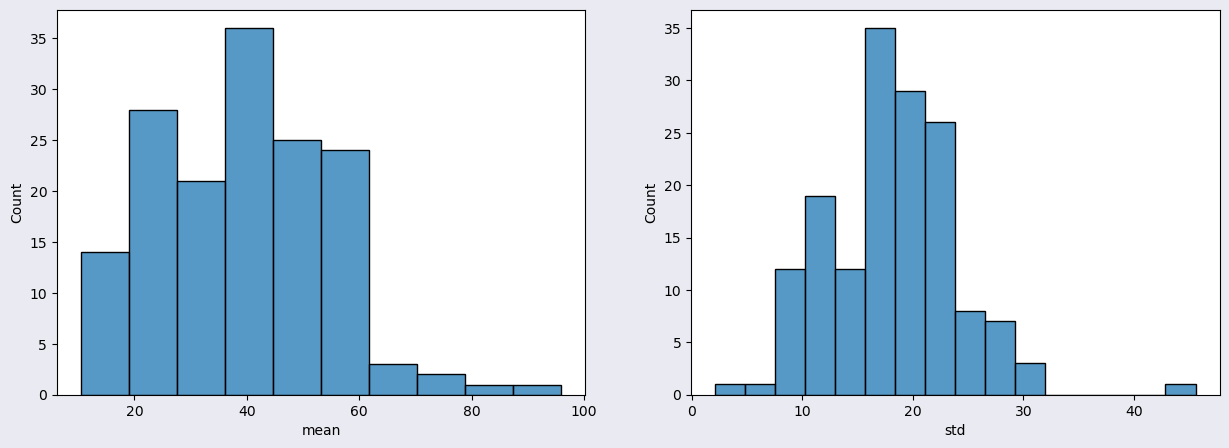

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=sort_std4,x='mean',ax=axes[0])
sns.histplot(data=sort_std4,x='std',ax=axes[1])
plt.show()

Visit month follows the left-skewed distribution. Hence in this preprocessing stage, we will use IQR-based technique to detect and thus remove outliers before performing any model training

In [25]:
sort_std_updrs_1=clinical_data.groupby(['visit_month']).describe()['updrs_1'].sort_values('count', ascending=False)
sort_std_updrs_1

,count,mean,std,min,25%,50%,75%,max
visit_month,,,,,,,,
36,130.0,9.553846,5.726400,0.0,5.00,8.0,13.75,27.0
30,120.0,9.491667,5.504766,0.0,5.00,9.0,14.00,27.0
24,117.0,9.264957,5.376182,0.0,6.00,8.0,12.00,25.0
48,114.0,10.026316,6.560084,0.0,5.00,9.0,14.00,28.0
42,113.0,9.353982,5.725757,0.0,5.00,8.0,13.00,29.0
18,98.0,8.510204,5.189690,0.0,5.00,8.0,11.75,28.0
60,96.0,9.625000,6.622529,0.0,5.00,7.5,14.00,31.0
54,93.0,9.333333,6.653429,0.0,5.00,8.0,12.00,31.0
12,91.0,8.813187,5.215175,0.0,5.00,8.0,11.00,26.0


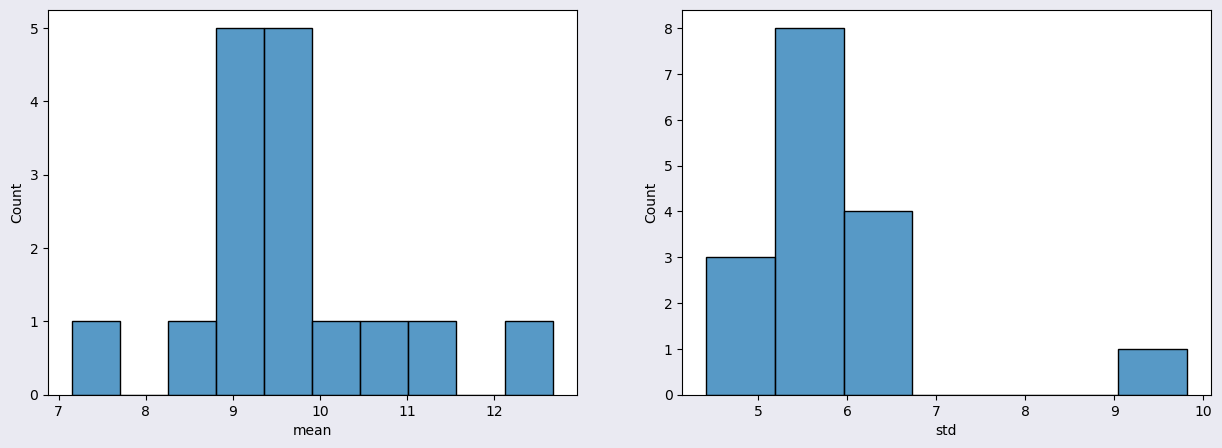

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=sort_std_updrs_1,x='mean',ax=axes[0])
sns.histplot(data=sort_std_updrs_1,x='std',ax=axes[1])
plt.show()

UDRP_1 follows the normal distribution? Hence in this preprocessing stage, we will use IQR-based technique to detect and thus remove outliers before performing any model training

In [27]:
clinical_data.corr()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
patient_id,1.000000,-0.028712,0.036493,-0.012455,0.017192,-0.013595
visit_month,-0.028712,1.000000,0.050407,0.159990,0.246233,0.081698
updrs_1,0.036493,0.050407,1.000000,0.601505,0.269325,0.388314
updrs_2,-0.012455,0.159990,0.601505,1.000000,0.567040,0.327603
updrs_3,0.017192,0.246233,0.269325,0.567040,1.000000,0.140231
updrs_4,-0.013595,0.081698,0.388314,0.327603,0.140231,1.000000


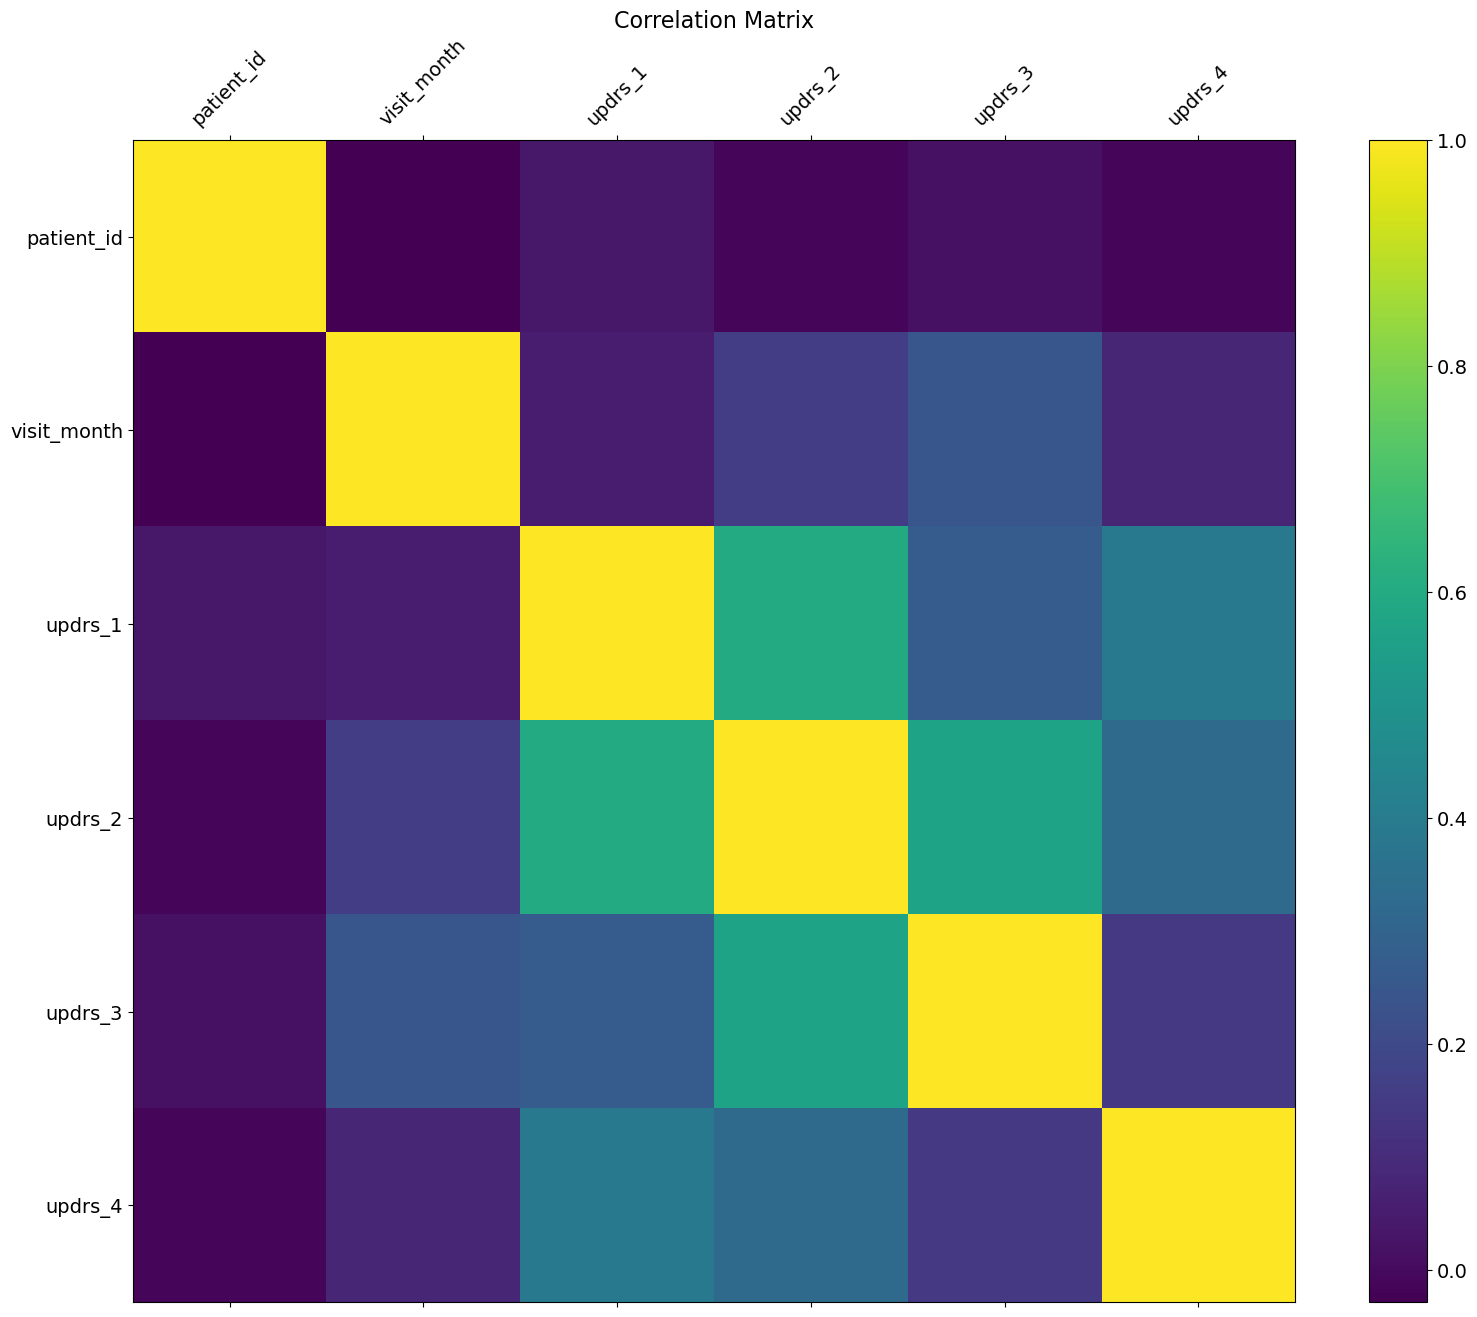

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(clinical_data.corr(), fignum=f.number)
plt.xticks(range(clinical_data.select_dtypes(['number']).shape[1]), clinical_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(clinical_data.select_dtypes(['number']).shape[1]), clinical_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Step 4: Insights Summary

High correlation >0.9 between:
* updrs_2 and updrs_1
* updrs_2 and updrs_3

Moderate correlation around 0.4 < score < 0.6 betwen
* updrs_1 and updrs_4

Weak correlation 0.2 < score < 0.4 between 
* visit_month and updrs_2

# Word Cloud

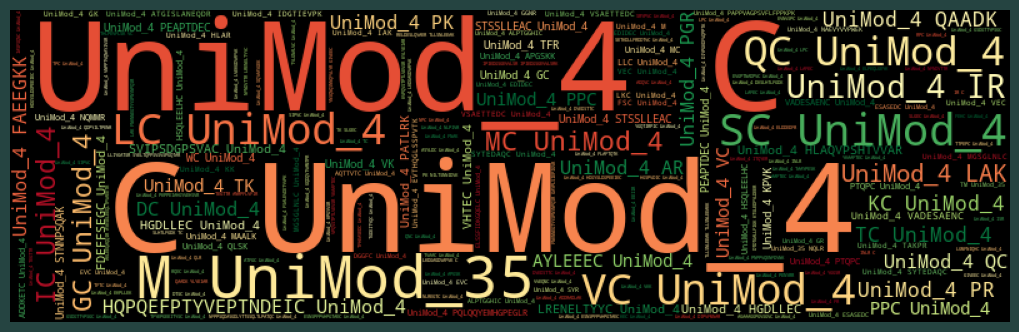

In [29]:
# Start with the peptide column
text = " ".join(x for x in peptides["Peptide"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (10, 8),facecolor= "#254441") 

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

In the peptides dataset (peptides_train.csv), under peptide column, it looks that 'C', 'UniMod 4', and 'UniMod_35' appear most frequently.

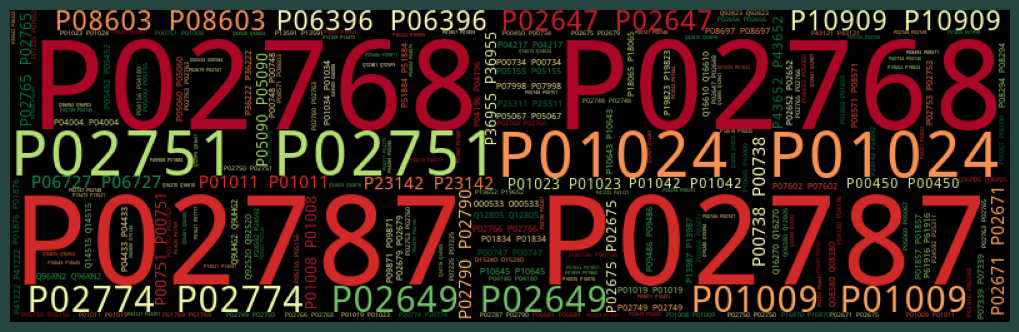

In [30]:
# Start with the peptide column
text = " ".join(x for x in peptides["UniProt"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (10, 8),facecolor= "#254441") 

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

(to be continue)